In [280]:
%matplotlib inline

In [281]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 16]

In [287]:
home = os.environ['HOME'] # if the HOME variable is set to '/Users/lou', we are on Lou's mac, else Github
if home == '/Users/lou':
    filename = '/Users/lou/GITHubProjects/Thinkful/Datafiles/planecrashinfo_20181121001952_clean.csv'
else:
    filename = 'planecrashinfo_20181121001952_clean.csv'
    
crashes_df = pd.read_csv(filename)

crashes_raw = pd.read_csv('planecrashinfo_20181121001952.csv.zip', compression='zip')

In [288]:
# let's remove all the NaN's for the numeric data types
crashes_df = crashes_df.dropna(subset=['aboard_count'])
crashes_df = crashes_df.dropna(subset=['fatal_count'])  
crashes_df = crashes_df.dropna(subset=['ground'])

# let's strip off all leading and trailing spaces from the numeric data types
crashes_df = crashes_df[(crashes_df['aboard_count'].str.strip() != '?')] # remove unknown aboard_cont
crashes_df = crashes_df[(crashes_df['ground'].str.strip()       != '?')] # remove unknown ground count
crashes_df = crashes_df[(crashes_df['fatal_count'].str.strip()  != '?')] # remove unknown fatal_count

# let's convert all of these numeric data types to numerics
crashes_df['ground']       = pd.to_numeric(crashes_df['ground'])
crashes_df['aboard_count'] = pd.to_numeric(crashes_df['aboard_count'])
crashes_df['fatal_count']  = pd.to_numeric(crashes_df['fatal_count'])
crashes_df['crashdate'] =    pd.to_datetime(crashes_df['crashdate'])
crashes_df['crashyear'] =    crashes_df['crashdate'].dt.year

FATALITIES = 150
# we only want big crashes, more than n fatalties
crashes_big = crashes_df[(crashes_df['fatal_count']  > FATALITIES)]
crashes_df = crashes_big
crashes_df.index.name = None

In [289]:
# crashes_df_ac_type for Boeing B-747
crashes_df_ac_type = crashes_df[(crashes_df['ac_type'].str.startswith('Boeing B-747'))]
crashes_df_ac_type.sort_values(['ac_type', 'fatal_count'],ascending=True) # sort it
crashes_df_ac_type = crashes_df_ac_type.groupby('ac_type')[['country_code','fatal_count', 'ground', 'crashdate', 'crashyear', 'operator_code', 'ac_type']].mean()
crashes_df_ac_type.sort_values(['crashyear', 'fatal_count'],ascending=True) # sort it

,country_code,fatal_count,ground,crashyear,operator_code
ac_type,,,,,
Boeing B-747-121 / Boeing B-747-206B,1780.0,583.0,0.0,1977.0,20970.0
Boeing B-747-237B,2175.0,271.0,0.0,1981.5,3180.0
Boeing B-747-283B,4690.0,181.0,0.0,1983.0,6850.0
Boeing B-747-230B,4310.0,269.0,0.0,1983.0,15020.0
Boeing B-747-SR46,3020.0,520.0,0.0,1985.0,14280.0
Boeing B-747-244B Combi,2880.0,159.0,0.0,1987.0,24690.0
Boeing B-747-121A,4440.0,259.0,11.0,1988.0,20960.0
Boeing B-747-131,5120.0,230.0,0.0,1996.0,26660.0
Boeing B-747-168B / Ilyushin IL-76TD,2870.0,349.0,0.0,1996.0,23400.0


In [302]:
fatalities_count = crashes_df.fatalities.str.split(' ', n=1, expand=True)
aboards_count = crashes_df.aboard.str.split(' ', n=1, expand=True)
crashes_df['fatalities_count'] = fatalities_count[0].astype(int)
crashes_df['aboards_count'] = aboards_count[0].astype(int)
crashes_df['survival_rate'] = (crashes_df.aboards_count - crashes_df.fatalities_count) / crashes_df.aboards_count
operator_idx, operator_val = crashes_df.operator.factorize()
crashes_df['operator_factor'] = operator_idx

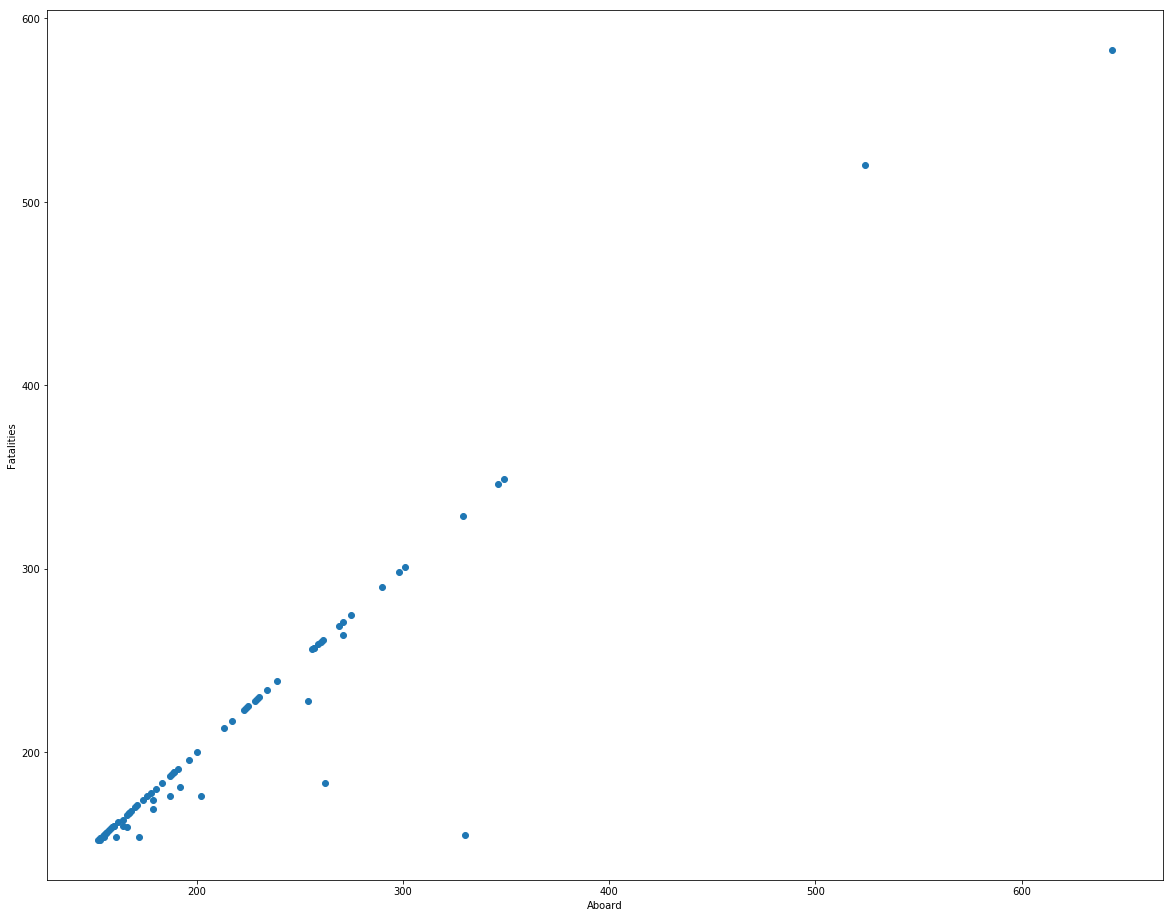

In [304]:
plt.scatter(crashes_df.aboards_count, crashes_df.fatalities_count)
plt.xlabel('Aboard')
_ = plt.ylabel('Fatalities')

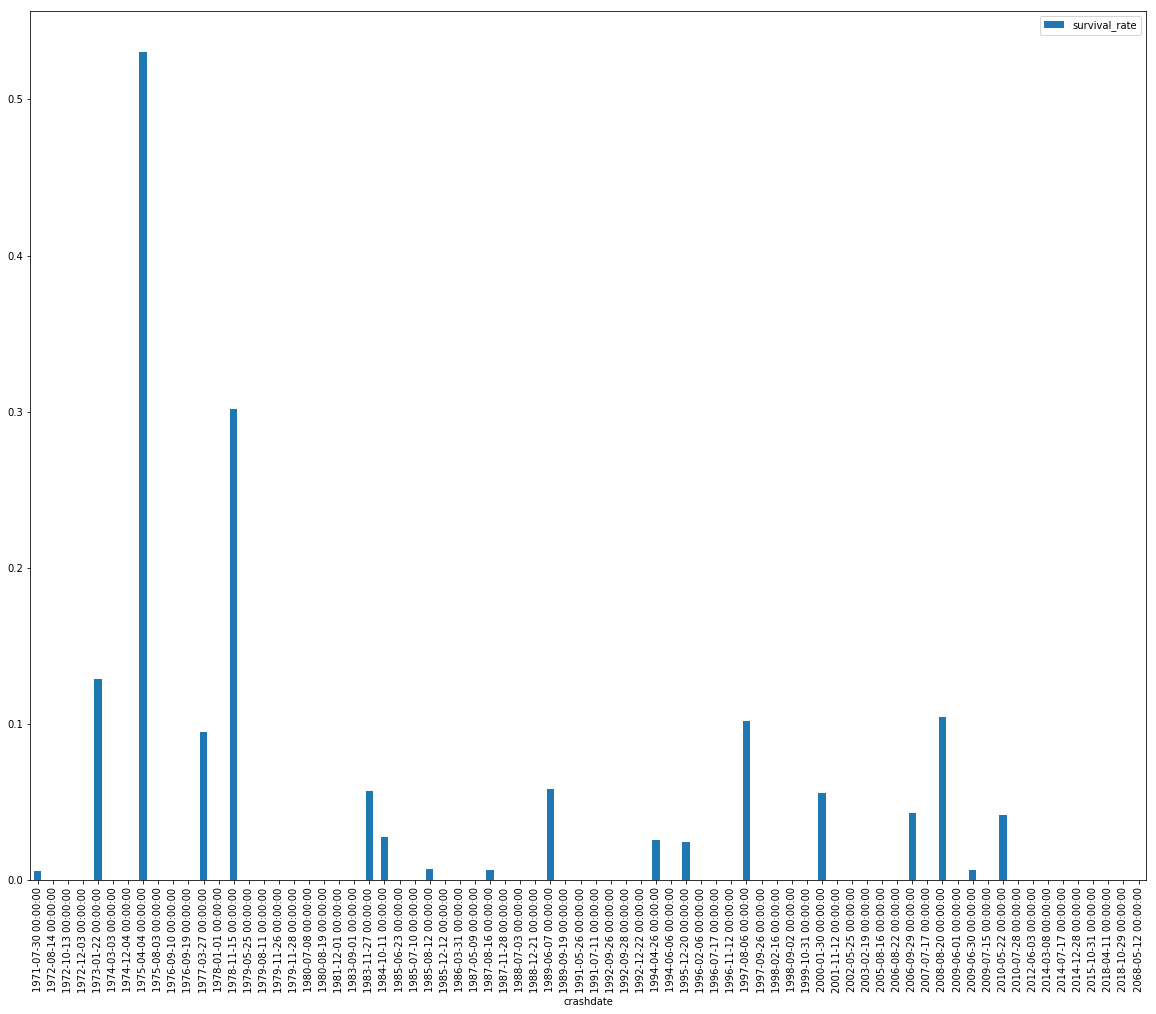

In [297]:
crashes_sorted = crashes_df.sort_values('crashdate')
_ = crashes_sorted.plot.bar(x='crashdate',y='survival_rate')

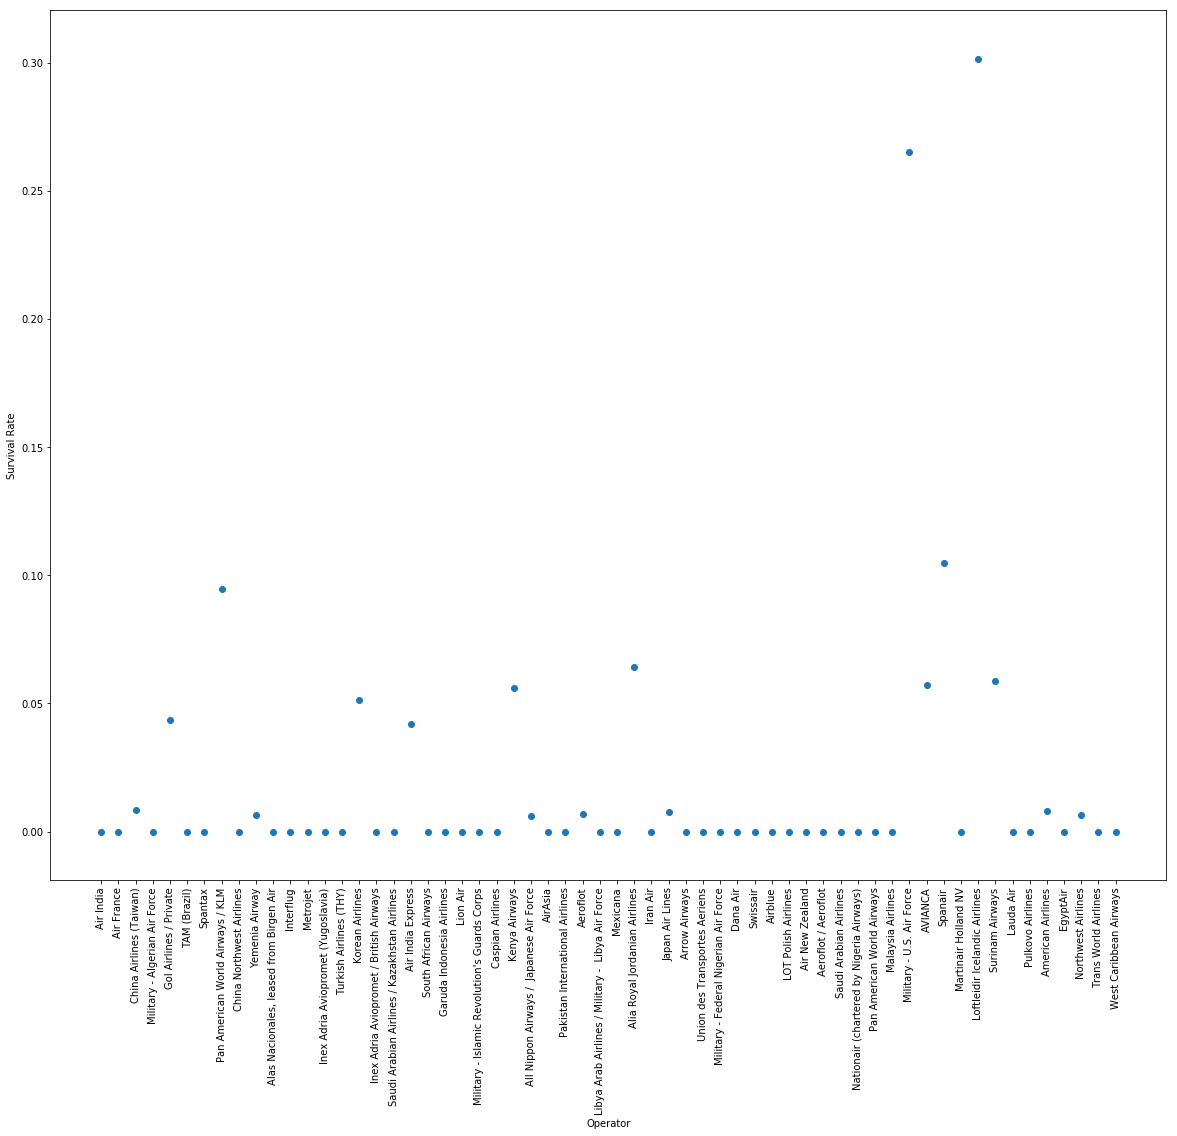

In [298]:
operator_group = crashes_df.groupby('operator_factor')
operator_keys = operator_group.groups.keys()
plt.scatter(operator_keys, list(operator_group.mean().survival_rate))
plt.xticks(list(operator_keys), [operator_val[k] for k in operator_keys], rotation=90)
plt.xlabel('Operator')
_ = plt.ylabel('Survival Rate')


### Let's plot the known crashes of the Boeing B-747 of crashes over 150 people over the last 40 years

### Questions to consider:
### Has there been a decrease in the fatalities involving the Boeing B-747 over the last 40 years?

### This chart appears to suggest that the trend line looks to be decreasing.

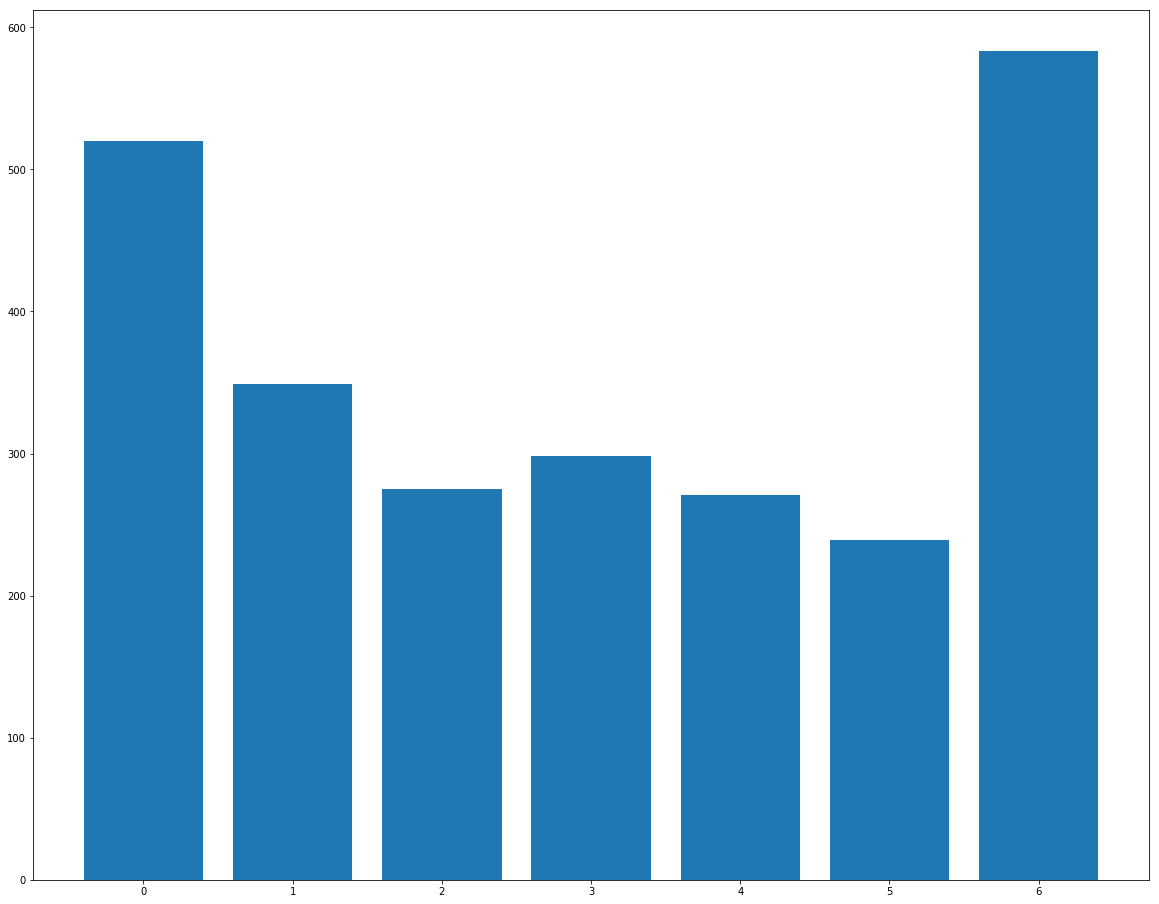

In [299]:
plt.bar(crashes_df.crashdate.dt.dayofweek, crashes_df.fatal_count)
plt.show()

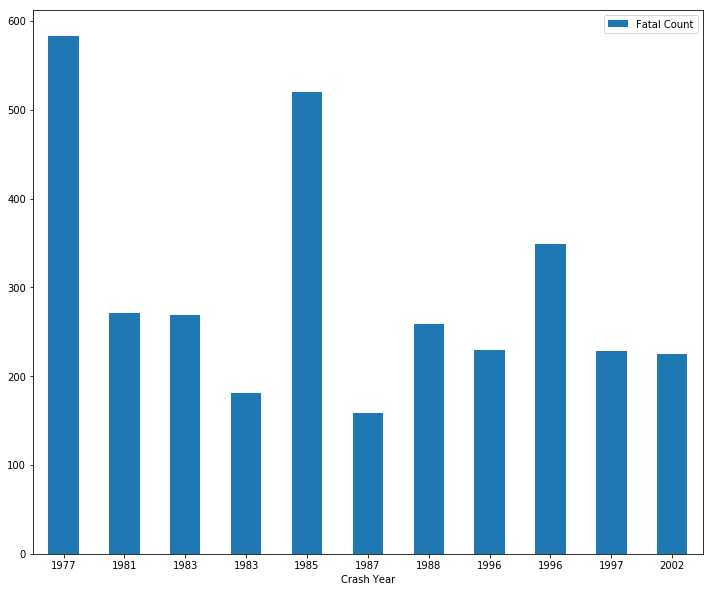

In [300]:
crashes_df_ac_type = crashes_df_ac_type.sort_values(['crashyear'],ascending=True) # sort it
df = pd.DataFrame({'Crash Year': crashes_df_ac_type['crashyear'].astype(int), 'Fatal Count' : crashes_df_ac_type['fatal_count']})
df.plot.bar(x='Crash Year', y='Fatal Count', rot=0, figsize=(12, 10))